# To the Moon and Beyond..

Classic 3 body problem: Need to send a satellite to the moon by considering the gravitational effects of Earth and Moon only. Effects of Sun are ignored, as the mass of satellite is very small as compared to the mass of Earth and Moon.

We have formulated the Hamiltonian of this 3 body problem and we got the equation of motions as:

$\frac{dr}{dt} = \frac{p_r}{\mu} $ 

$\frac{d\phi}{dt} = \frac{p_{\phi}}{\mu r^2}$ 

$\frac{dp_r}{dt} = \frac{p_{\phi}^{2}}{\mu r^3}-\frac{Gm_1\mu}{s_1^{3}}[r-r_1 \, \cos(\phi-\omega t)]-\frac{Gm_2\mu}{s_2^{3}}[r+r_2 \, \cos(\phi-\omega t)]$

$\frac{dp_{\phi}}{dt} = -\frac{Gm_1\mu}{s_1^{3}}[rr_1 \, \sin(\phi-\omega t)] + \frac{Gm_2\mu}{s_2^{3}}[rr_2 \, \sin(\phi-\omega t)]$

Here, $s_1^{3} = [r^2+ r_1^{2}- 2rr_1 \, \cos(\phi- \omega t)]^{3/2}$ and $s_2^{3} = [r^2+ r_2^{2}+ 2rr_2 \, \cos(\phi- \omega t)]^{3/2}$

So, these are 4 first order coupled differential equations, which we need to solve simultaneously using RK-4 method. So, let's begin:

## Satellite thrown towards Earth with escape velocity :

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import numpy as np
sns.set_style('darkgrid')

Text(-349090.9074498725, -17053.010546832054, 'Moon')

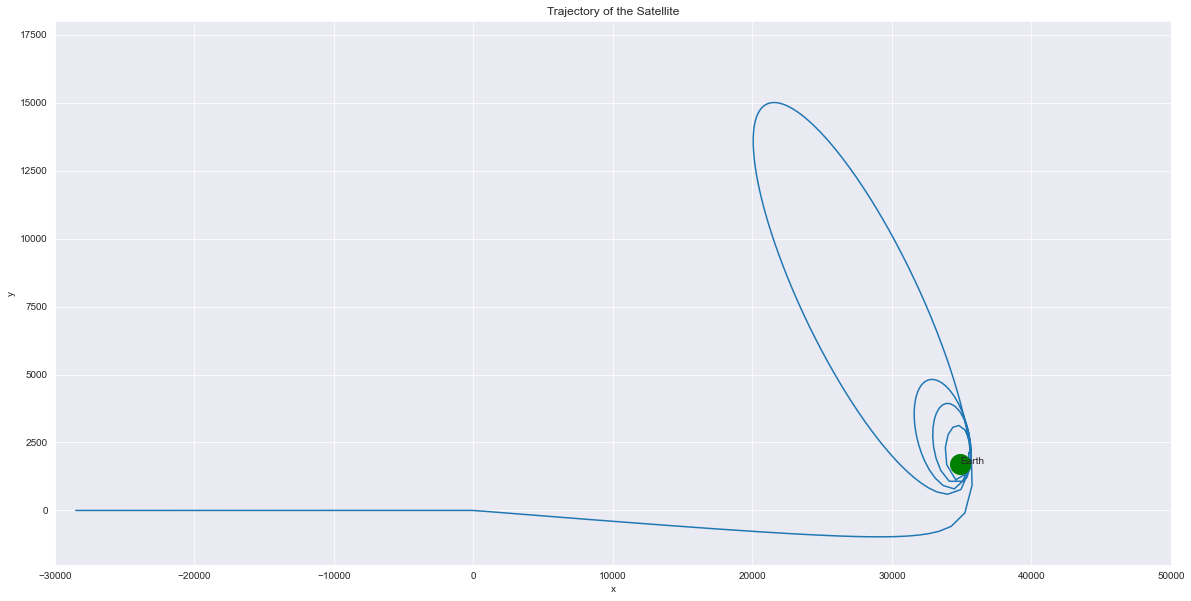

In [6]:
# The variables will be: r, o, pr and po

# Define the functions:

def s13(t,r,o):
    return np.sqrt(r**2 + r1**2 - 2.0*r*r1* np.cos(o - w*t))**3

def s23(t,r,o):
    return np.sqrt(r**2 + r2**2 + 2.0*r*r2* np.cos(o - w*t))**3

def fr(t,r,o,pr,po):
    return pr       # u = 1

def fo(t,r,o,pr,po):
    return po/(r**2) 

def fpr(t,r,o,pr,po):
    return (po**2/(r**3)) - (((gm1)/(s13(t,r,o)))*(r - r1* np.cos(o - w*t))) - (((gm2)/(s23(t,r,o)))*(r + r2* np.cos(o - w*t)))
 
def fpo(t,r,o,pr,po):
    return - (((gm1)/(s13(t,r,o)))*(r*r1* np.sin(o - w*t))) + (((gm2)/(s23(t,r,o)))*(r*r2* np.sin(o - w*t)))

#Define the constants:

rm = 10 # m1/m2
w = 2.0* (np.pi/(27.0*24.0)) #rad/hour
r1 = (3.84e5)/(1+rm)
r2 = (3.84e5*rm)/(1+rm)
gm1 = w**2 * r2 * 14.7e10
gm2 = gm1/rm

# Define the initial constants:

ti = 0
tf = 24*0.21 # hours
h = 0.01 # hours
n = int((tf-ti)/h)
r0 = 6400.0 - r1 # (km) launched towards earth centre
o0 = 0
pr0 = 4e4 # Earth's escape velocity
po0 = np.pi/10.0

# start process :

t = ti
r = r0
o = o0
pr = pr0
po = po0
x = r0* np.cos(o0)
y = r0* np.sin(o0)
xe = r1* np.cos(w*ti)
ye = r1* np.sin(w*ti)
xm = -r2* np.cos(w*ti)
ym = -r2* np.sin(w*ti)

r_list = [r0]
o_list = [o0]
pr_list = [pr0]
po_list = [po0]
t_list = [ti]
x_list = [r* np.cos(o)]
y_list = [r* np.sin(o)]
xe_list = [r1* np.cos(w*t)]
ye_list = [r1* np.sin(w*t)]
xm_list = [-r2* np.cos(w*t)]
ym_list = [-r2* np.sin(w*t)]

for i in range(n):
    
    #print(t,r,o,pr,po,x,y,xe,ye,xm,ym)
    
    k1r = fr(t,r,o,pr,po)
    k1o = fo(t,r,o,pr,po)
    k1pr = fpr(t,r,o,pr,po)
    k1po = fpo(t,r,o,pr,po)
    
    k2r = fr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2o = fo(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2pr = fpr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2po = fpo(t+ h/2.0, r + (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    
    k3r = fr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3o = fo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3pr = fpr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3po = fpo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    
    k4r = fr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4o = fo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4pr = fpr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4po = fpo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    
    r = r + (h/6.0)*(k1r + 2.0* k2r + 2.0* k3r + k4r)
    o = o + (h/6.0)*(k1o + 2.0* k2o + 2.0* k3o + k4o)
    pr = pr + (h/6.0)*(k1pr + 2.0* k2pr + 2.0* k3pr + k4pr)
    po = po + (h/6.0)*(k1po + 2.0* k2po + 2.0* k3po + k4po)
    t = t+h
    x = r* np.cos(o)
    y = r* np.sin(o)
    xe = r1* np.cos(w*t)
    ye = r1* np.sin(w*t)
    xm = -r2* np.cos(w*t)
    ym = -r2* np.sin(w*t)
    
    r_list.append(r)
    o_list.append(o*(180.0/mth.pi))
    pr_list.append(pr)
    po_list.append(po)
    x_list.append(x)
    y_list.append(y)
    xe_list.append(xe)
    ye_list.append(ye)
    xm_list.append(xm)
    ym_list.append(ym)
    t_list.append(t)
    
plt.plot(x_list, y_list)
plt.axis([-30000,50000,-2000,18000])
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Trajectory of the Satellite")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xe_list[-1],ye_list[-1], marker="o",markersize=20, color = 'green')
plt.annotate("Earth",(xe_list[-1],ye_list[-1]))
plt.plot(xm_list[-1],ym_list[-1], marker="o",markersize=20, color = 'blue')
plt.annotate("Moon",(xm_list[1],ym_list[-1]))

## Satellite launched towards moon :

### Comes back to Earth Surface :

Text(-376470.5864655487, -1679.1608761561447, 'Moon')

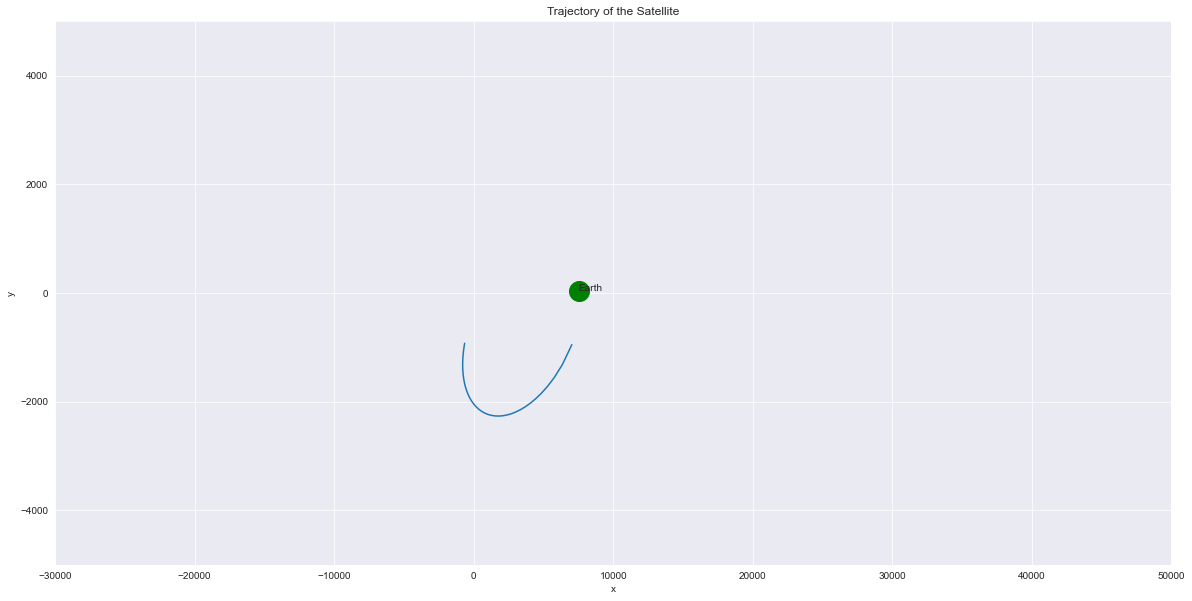

In [3]:
# Define the functions:

def s13(t,r,o):
    return np.sqrt(r**2 + r1**2 - 2.0*r*r1* np.cos(o - w*t))**3

def s23(t,r,o):
    return np.sqrt(r**2 + r2**2 + 2.0*r*r2* np.cos(o - w*t))**3

def fr(t,r,o,pr,po):
    return pr       # u = 1

def fo(t,r,o,pr,po):
    return po/(r**2) 

def fpr(t,r,o,pr,po):
    return (po**2/(r**3)) - (((gm1)/(s13(t,r,o)))*(r - r1* np.cos(o - w*t))) - (((gm2)/(s23(t,r,o)))*(r + r2* np.cos(o - w*t)))
 
def fpo(t,r,o,pr,po):
    return - (((gm1)/(s13(t,r,o)))*(r*r1* np.sin(o - w*t))) + (((gm2)/(s23(t,r,o)))*(r*r2* np.sin(o - w*t)))

#Define the constants:

rm = 50 # m1/m2
w = 2.0* (np.pi/(27.0*24.0)) #rad/hour
r1 = (3.84e5)/(1+rm)
r2 = (3.84e5*rm)/(1+rm)
gm1 = w**2 * r2 * 14.7e10
gm2 = gm1/rm

# Define the initial constants:

ti = 0
tf = 0.47 # hours
h = 0.01 # hours
n = int((tf-ti)/h)
r0 = r1 - 6400 # (km) launched towards moon
o0 = 47*np.pi/36 # 235 degree
pr0 = 8059 # km/hr
po0 = 65*np.pi/36 # 325 degree

# start process :

t = ti
r = r0
o = o0
pr = pr0
po = po0
x = r0* np.cos(o0)
y = r0* np.sin(o0)
xe = r1* np.cos(w*ti)
ye = r1* np.sin(w*ti)
xm = -r2* np.cos(w*ti)
ym = -r2* np.sin(w*ti)

r_list = [r0]
o_list = [o0]
pr_list = [pr0]
po_list = [po0]
t_list = [ti]
x_list = [r* np.cos(o)]
y_list = [r* np.sin(o)]
xe_list = [r1* np.cos(w*t)]
ye_list = [r1* np.sin(w*t)]
xm_list = [-r2* np.cos(w*t)]
ym_list = [-r2* np.sin(w*t)]

for i in range(n):
    
    #print(t,r,o,pr,po,x,y,xe,ye,xm,ym)
    
    k1r = fr(t,r,o,pr,po)
    k1o = fo(t,r,o,pr,po)
    k1pr = fpr(t,r,o,pr,po)
    k1po = fpo(t,r,o,pr,po)
    
    k2r = fr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2o = fo(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2pr = fpr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2po = fpo(t+ h/2.0, r + (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    
    k3r = fr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3o = fo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3pr = fpr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3po = fpo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    
    k4r = fr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4o = fo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4pr = fpr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4po = fpo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    
    r = r + (h/6.0)*(k1r + 2.0* k2r + 2.0* k3r + k4r)
    o = o + (h/6.0)*(k1o + 2.0* k2o + 2.0* k3o + k4o)
    pr = pr + (h/6.0)*(k1pr + 2.0* k2pr + 2.0* k3pr + k4pr)
    po = po + (h/6.0)*(k1po + 2.0* k2po + 2.0* k3po + k4po)
    t = t+h
    x = r* np.cos(o)
    y = r* np.sin(o)
    xe = r1* np.cos(w*t)
    ye = r1* np.sin(w*t)
    xm = -r2* np.cos(w*t)
    ym = -r2* np.sin(w*t)
    
    r_list.append(r)
    o_list.append(o*(180.0/mth.pi))
    pr_list.append(pr)
    po_list.append(po)
    x_list.append(x)
    y_list.append(y)
    xe_list.append(xe)
    ye_list.append(ye)
    xm_list.append(xm)
    ym_list.append(ym)
    t_list.append(t)

 
plt.plot(x_list, y_list) 
plt.axis([-30000,50000,-5000, 5000])
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Trajectory of the Satellite")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xe_list[-1],ye_list[-1], marker="o",markersize=20, color = 'green')
plt.annotate("Earth",(xe_list[-1],ye_list[-1]))
plt.plot(xm_list[-1],ym_list[-1], marker="o",markersize=10, color = 'blue')
plt.annotate("Moon",(xm_list[1],ym_list[-1]))

### Orbits around earth :

Text(-376470.5864655487, -5475.3497041252385, 'Moon')

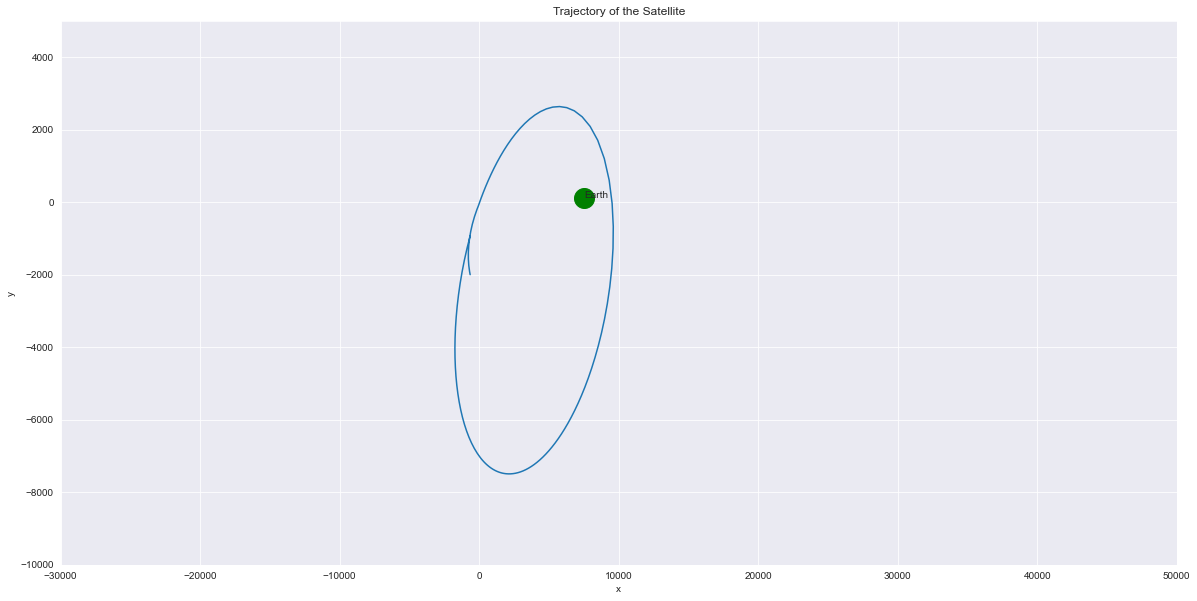

In [4]:
# Define the functions:

def s13(t,r,o):
    return np.sqrt(r**2 + r1**2 - 2.0*r*r1* np.cos(o - w*t))**3

def s23(t,r,o):
    return np.sqrt(r**2 + r2**2 + 2.0*r*r2* np.cos(o - w*t))**3

def fr(t,r,o,pr,po):
    return pr       # u = 1

def fo(t,r,o,pr,po):
    return po/(r**2) 

def fpr(t,r,o,pr,po):
    return (po**2/(r**3)) - (((gm1)/(s13(t,r,o)))*(r - r1* np.cos(o - w*t))) - (((gm2)/(s23(t,r,o)))*(r + r2* np.cos(o - w*t)))
 
def fpo(t,r,o,pr,po):
    return - (((gm1)/(s13(t,r,o)))*(r*r1* np.sin(o - w*t))) + (((gm2)/(s23(t,r,o)))*(r*r2* np.sin(o - w*t)))

#Define the constants:

rm = 50 # m1/m2
w = 2.0* (np.pi/(27.0*24.0)) #rad/hour
r1 = (3.84e5)/(1+rm)
r2 = (3.84e5*rm)/(1+rm)
gm1 = w**2 * r2 * 14.7e10
gm2 = gm1/rm

# Define the initial constants:

ti = 0
tf = 1.5 # hours
h = 0.01 # hours
n = int((tf-ti)/h)
r0 = r1 - 6400 # (km) launched towards moons
o0 = 47*np.pi/36 # 235 degree
pr0 = 20559 # km/hr
po0 = 65*np.pi/36 # 325 degree

# start process :

t = ti
r = r0
o = o0
pr = pr0
po = po0
x = r0* np.cos(o0)
y = r0* np.sin(o0)
xe = r1* np.cos(w*ti)
ye = r1* np.sin(w*ti)
xm = -r2* np.cos(w*ti)
ym = -r2* np.sin(w*ti)

r_list = [r0]
o_list = [o0]
pr_list = [pr0]
po_list = [po0]
t_list = [ti]
x_list = [r* np.cos(o)]
y_list = [r* np.sin(o)]
xe_list = [r1* np.cos(w*t)]
ye_list = [r1* np.sin(w*t)]
xm_list = [-r2* np.cos(w*t)]
ym_list = [-r2* np.sin(w*t)]

for i in range(n):
    
    #print(t,r,o,pr,po,x,y,xe,ye,xm,ym)
    
    k1r = fr(t,r,o,pr,po)
    k1o = fo(t,r,o,pr,po)
    k1pr = fpr(t,r,o,pr,po)
    k1po = fpo(t,r,o,pr,po)
    
    k2r = fr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2o = fo(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2pr = fpr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2po = fpo(t+ h/2.0, r + (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    
    k3r = fr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3o = fo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3pr = fpr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3po = fpo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    
    k4r = fr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4o = fo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4pr = fpr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4po = fpo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    
    r = r + (h/6.0)*(k1r + 2.0* k2r + 2.0* k3r + k4r)
    o = o + (h/6.0)*(k1o + 2.0* k2o + 2.0* k3o + k4o)
    pr = pr + (h/6.0)*(k1pr + 2.0* k2pr + 2.0* k3pr + k4pr)
    po = po + (h/6.0)*(k1po + 2.0* k2po + 2.0* k3po + k4po)
    t = t+h
    x = r* np.cos(o)
    y = r* np.sin(o)
    xe = r1* np.cos(w*t)
    ye = r1* np.sin(w*t)
    xm = -r2* np.cos(w*t)
    ym = -r2* np.sin(w*t)
    
    r_list.append(r)
    o_list.append(o*(180.0/mth.pi))
    pr_list.append(pr)
    po_list.append(po)
    x_list.append(x)
    y_list.append(y)
    xe_list.append(xe)
    ye_list.append(ye)
    xm_list.append(xm)
    ym_list.append(ym)
    t_list.append(t)

 
plt.plot(x_list, y_list)
plt.axis([-30000,50000,-10000, 5000])
plt.rcParams["figure.figsize"] = (20, 10)
plt.title("Trajectory of the Satellite")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xe_list[-1],ye_list[-1], marker="o",markersize=20, color = 'green')
plt.annotate("Earth",(xe_list[-1],ye_list[-1]))
plt.plot(xm_list[-1],ym_list[-1], marker="o",markersize=10, color = 'blue')
plt.annotate("Moon",(xm_list[1],ym_list[-1]))

### Reaches Moon Surface :

Text(-349090.9074498725, -184961.2914077215, 'Moon')

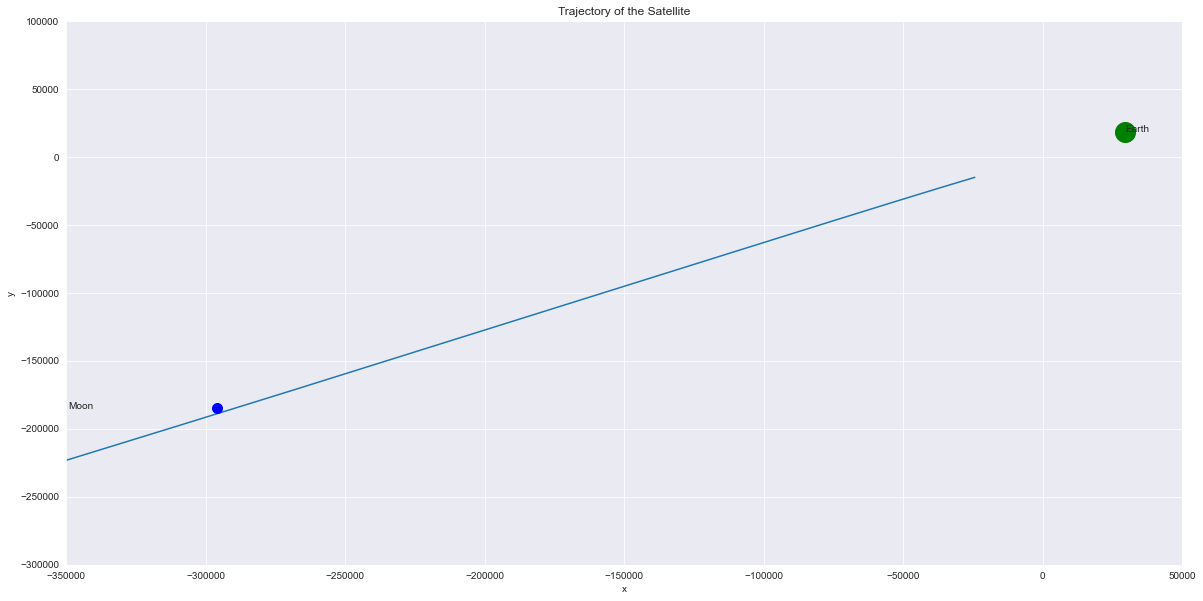

In [5]:
# Define the functions:

def s13(t,r,o):
    return np.sqrt(r**2 + r1**2 - 2.0*r*r1* np.cos(o - w*t))**3

def s23(t,r,o):
    return np.sqrt(r**2 + r2**2 + 2.0*r*r2* np.cos(o - w*t))**3

def fr(t,r,o,pr,po):
    return pr       # u = 1

def fo(t,r,o,pr,po):
    return po/(r**2) 

def fpr(t,r,o,pr,po):
    return (po**2/(r**3)) - (((gm1)/(s13(t,r,o)))*(r - r1* np.cos(o - w*t))) - (((gm2)/(s23(t,r,o)))*(r + r2* np.cos(o - w*t)))
 
def fpo(t,r,o,pr,po):
    return - (((gm1)/(s13(t,r,o)))*(r*r1* np.sin(o - w*t))) + (((gm2)/(s23(t,r,o)))*(r*r2* np.sin(o - w*t)))

#Define the constants:

rm = 10 # m1/m2
w = 2.0* (np.pi/(27.0*24.0)) #rad/hour
r1 = (3.84e5)/(1+rm)
r2 = (3.84e5*rm)/(1+rm)
gm1 = w**2 * r2 * 14.7e10
gm2 = gm1/rm

# Define the initial constants:

ti = 0
tf = 24*2.4 # hours
h = 0.01 # hours
n = int((tf-ti)/h)
r0 = r1-6400 # (km) launched towards moons
o0 = 3.69066 # 211.459 degree
pr0 = 21882 # km/hr
po0 = 3.49066 # 200.000 degree


# start process :

t = ti
r = r0
o = o0
pr = pr0
po = po0
x = r0* np.cos(o0)
y = r0* np.sin(o0)
xe = r1* np.cos(w*ti)
ye = r1* np.sin(w*ti)
xm = -r2* np.cos(w*ti)
ym = -r2* np.sin(w*ti)

r_list = [r0]
o_list = [o0]
pr_list = [pr0]
po_list = [po0]
t_list = [ti]
x_list = [r* np.cos(o)]
y_list = [r* np.sin(o)]
xe_list = [r1* np.cos(w*t)]
ye_list = [r1* np.sin(w*t)]
xm_list = [-r2* np.cos(w*t)]
ym_list = [-r2* np.sin(w*t)]

for i in range(n):
    
    #print(t,r,o,pr,po,x,y,xe,ye,xm,ym)
    
    k1r = fr(t,r,o,pr,po)
    k1o = fo(t,r,o,pr,po)
    k1pr = fpr(t,r,o,pr,po)
    k1po = fpo(t,r,o,pr,po)
    
    k2r = fr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2o = fo(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2pr = fpr(t+ h/2.0, r+ (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    k2po = fpo(t+ h/2.0, r + (k1r*h)/2.0, o+ (k1o*h)/2.0, pr+ (k1pr*h)/2.0, po+ (k1po*h)/2.0)
    
    k3r = fr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3o = fo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3pr = fpr(t+ h/2.0, r+ (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    k3po = fpo(t+ h/2.0, r + (k2r*h)/2.0, o+ (k2o*h)/2.0, pr+ (k2pr*h)/2.0, po+ (k2po*h)/2.0)
    
    k4r = fr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4o = fo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4pr = fpr(t+ h, r+ k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    k4po = fpo(t+ h, r + k3r*h, o+ k3o*h, pr+ k3pr*h, po+ k3po*h)
    
    r = r + (h/6.0)*(k1r + 2.0* k2r + 2.0* k3r + k4r)
    o = o + (h/6.0)*(k1o + 2.0* k2o + 2.0* k3o + k4o)
    pr = pr + (h/6.0)*(k1pr + 2.0* k2pr + 2.0* k3pr + k4pr)
    po = po + (h/6.0)*(k1po + 2.0* k2po + 2.0* k3po + k4po)
    t = t+h
    x = r* np.cos(o)
    y = r* np.sin(o)
    xe = r1* np.cos(w*t)
    ye = r1* np.sin(w*t)
    xm = -r2* np.cos(w*t)
    ym = -r2* np.sin(w*t)
    
    r_list.append(r)
    o_list.append(o*(180.0/mth.pi))
    pr_list.append(pr)
    po_list.append(po)
    x_list.append(x)
    y_list.append(y)
    xe_list.append(xe)
    ye_list.append(ye)
    xm_list.append(xm)
    ym_list.append(ym)
    t_list.append(t)

 
plt.plot(x_list, y_list)    
plt.rcParams["figure.figsize"] = (20, 10)
plt.axis([-350000,50000,-300000, 100000])
plt.title("Trajectory of the Satellite")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xe_list[-1],ye_list[-1], marker="o",markersize=20, color = 'green')
plt.annotate("Earth",(xe_list[-1],ye_list[-1]))
plt.plot(xm_list[-1],ym_list[-1], marker="o",markersize=10, color = 'blue')
plt.annotate("Moon",(xm_list[1],ym_list[-1]))